In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
disease_df = pd.read_excel('TBT_05_updated_data.xlsx')

In [3]:
healthy_df = pd.read_excel('Simran_updated_data.xlsx')

In [4]:
disease_df.shape,healthy_df.shape

((30357, 46), (26882, 46))

In [5]:
data = pd.concat([disease_df,healthy_df])

In [6]:
data.tail()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Recording media name,Recording media width,Recording media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Ungrouped,Disease
26877,300479465,399643010,Eye Tracker,Project1,17-05-2024,SIMRAN,Recording025,15-05-2024,15-05-2024,14:31:17.063,...,fullstream.mp4,1920.0,1080.0,Fixation,120,579,875.0,559.0,NaN,0
26878,300489460,399653005,Eye Tracker,Project1,17-05-2024,SIMRAN,Recording025,15-05-2024,15-05-2024,14:31:17.063,...,fullstream.mp4,1920.0,1080.0,Fixation,120,579,875.0,559.0,NaN,0
26879,300499450,399662995,Eye Tracker,Project1,17-05-2024,SIMRAN,Recording025,15-05-2024,15-05-2024,14:31:17.063,...,fullstream.mp4,1920.0,1080.0,Fixation,120,579,875.0,559.0,NaN,0
26880,300509441,399672986,Eye Tracker,Project1,17-05-2024,SIMRAN,Recording025,15-05-2024,15-05-2024,14:31:17.063,...,fullstream.mp4,1920.0,1080.0,Fixation,120,579,875.0,559.0,NaN,0
26881,300519432,399682977,Eye Tracker,Project1,17-05-2024,SIMRAN,Recording025,15-05-2024,15-05-2024,14:31:17.063,...,fullstream.mp4,1920.0,1080.0,Fixation,120,579,875.0,559.0,NaN,0


In [7]:
data.columns

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration',
       'Recording Fixation filter name', 'Event', 'Event value',
       'Gaze point X', 'Gaze point Y', 'Gaze point 3D X', 'Gaze point 3D Y',
       'Gaze point 3D Z', 'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil position left X', 'Pupil position left Y',
       'Pupil position left Z', 'Pupil position right X',
       'Pupil position right Y', 'Pupil position right Z',
       'Pupil diameter left', 'Pupil diameter right', 'Validity left',
       'Validity right', 'Recording media name', 'Recording media width',
       'Recording media height', 'Eye movement type', 'Gaze event duration',
   

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57239 entries, 0 to 26881
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Recording timestamp             57239 non-null  int64  
 1   Computer timestamp              57239 non-null  int64  
 2   Sensor                          57239 non-null  object 
 3   Project name                    57239 non-null  object 
 4   Export date                     57239 non-null  object 
 5   Participant name                57239 non-null  object 
 6   Recording name                  57239 non-null  object 
 7   Recording date                  57239 non-null  object 
 8   Recording date UTC              57239 non-null  object 
 9   Recording start time            57239 non-null  object 
 10  Recording start time UTC        57239 non-null  object 
 11  Recording duration              57239 non-null  int64  
 12  Recording Fixation filter name  57239

In [9]:
df = data.iloc[:,15:].drop(['Recording media name', 'Recording media width','Recording media height','Ungrouped','Validity left',
       'Validity right',],axis=1)

In [10]:
df.head()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,...,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Disease
0,834,201,65.2976,194.7396,705.0029,0.04664,0.27595,0.96004,0.12449,0.28892,...,-22.12,-29.27,4.549,4.651,Fixation,165,1,832.0,204.0,1
1,834,201,66.5085,198.3373,718.1160,0.04779,0.27486,0.96029,0.12346,0.28925,...,-21.99,-29.26,4.596,4.688,Fixation,165,1,832.0,204.0,1
2,834,201,68.3859,204.2005,740.0531,0.04834,0.27521,0.96017,0.12270,0.28760,...,-22.12,-29.26,4.556,4.641,Fixation,165,1,832.0,204.0,1
3,833,202,69.6918,206.0272,749.0504,0.04987,0.27338,0.96061,0.12245,0.28747,...,-21.99,-29.25,4.588,4.671,Fixation,165,1,832.0,204.0,1
4,832,202,70.5377,207.4391,753.7401,0.04989,0.27496,0.96016,0.12342,0.28600,...,-22.12,-29.26,4.558,4.624,Fixation,165,1,832.0,204.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57239 entries, 0 to 26881
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gaze point X             57239 non-null  int64  
 1   Gaze point Y             57239 non-null  int64  
 2   Gaze point 3D X          57239 non-null  float64
 3   Gaze point 3D Y          57239 non-null  float64
 4   Gaze point 3D Z          57239 non-null  float64
 5   Gaze direction left X    57239 non-null  float64
 6   Gaze direction left Y    57239 non-null  float64
 7   Gaze direction left Z    57239 non-null  float64
 8   Gaze direction right X   57239 non-null  float64
 9   Gaze direction right Y   57239 non-null  float64
 10  Gaze direction right Z   57239 non-null  float64
 11  Pupil position left X    57239 non-null  float64
 12  Pupil position left Y    57239 non-null  float64
 13  Pupil position left Z    57239 non-null  float64
 14  Pupil position right X   57

In [12]:
df['Eye movement type'].unique()

array(['Fixation', 'EyesNotFound', 'Unclassified', 'Saccade'],
      dtype=object)

In [13]:
valuesToEncode = {'Fixation':0, 'EyesNotFound':1, 'Saccade':2, 'Unclassified':3}

In [14]:
# df[['Eye movement type']].applymap(valuesToEncode)
df.drop(['Eye movement type','Gaze event duration','Eye movement type index'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57239 entries, 0 to 26881
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gaze point X            57239 non-null  int64  
 1   Gaze point Y            57239 non-null  int64  
 2   Gaze point 3D X         57239 non-null  float64
 3   Gaze point 3D Y         57239 non-null  float64
 4   Gaze point 3D Z         57239 non-null  float64
 5   Gaze direction left X   57239 non-null  float64
 6   Gaze direction left Y   57239 non-null  float64
 7   Gaze direction left Z   57239 non-null  float64
 8   Gaze direction right X  57239 non-null  float64
 9   Gaze direction right Y  57239 non-null  float64
 10  Gaze direction right Z  57239 non-null  float64
 11  Pupil position left X   57239 non-null  float64
 12  Pupil position left Y   57239 non-null  float64
 13  Pupil position left Z   57239 non-null  float64
 14  Pupil position right X  57239 non-null  flo

In [16]:
df['Gaze point X'].iloc[:1000]

0      834
1      834
2      834
3      833
4      832
      ... 
995    920
996    919
997    918
998    916
999    915
Name: Gaze point X, Length: 1000, dtype: int64

In [17]:
df['Fixation point X'].fillna(df['Fixation point X'].mean(),inplace=True)
df['Fixation point Y'].fillna(df['Fixation point Y'].mean(),inplace=True)

In [18]:
df.isnull().sum()

Gaze point X              0
Gaze point Y              0
Gaze point 3D X           0
Gaze point 3D Y           0
Gaze point 3D Z           0
Gaze direction left X     0
Gaze direction left Y     0
Gaze direction left Z     0
Gaze direction right X    0
Gaze direction right Y    0
Gaze direction right Z    0
Pupil position left X     0
Pupil position left Y     0
Pupil position left Z     0
Pupil position right X    0
Pupil position right Y    0
Pupil position right Z    0
Pupil diameter left       0
Pupil diameter right      0
Fixation point X          0
Fixation point Y          0
Disease                   0
dtype: int64

In [19]:
df.drop(['Fixation point X','Fixation point Y'],axis=1,inplace=True)

In [20]:
df = df.sample(frac=1).reset_index(drop=True)

In [21]:
df.head(10)

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Disease
0,870,447,30.0412,30.7271,489.4609,-0.00233,0.09347,0.99562,0.11711,0.09674,0.98840,31.31,-18.89,-27.32,-31.20,-18.75,-27.16,3.676,3.440,0
1,621,176,161.5331,173.2975,583.4825,0.20433,0.28133,0.93761,0.28050,0.30803,0.90909,31.78,-23.44,-31.93,-31.67,-22.12,-29.04,4.227,4.111,1
2,870,138,40.0813,216.5730,655.9355,0.01606,0.33951,0.94046,0.09615,0.31660,0.94368,30.63,-23.18,-31.73,-32.22,-21.75,-29.35,4.045,3.998,1
3,965,425,-11.9307,44.8149,543.5453,-0.07379,0.11524,0.99059,0.03322,0.10874,0.99352,30.90,-18.69,-27.70,-31.55,-18.30,-27.71,4.024,3.845,0
4,833,37,65.6117,294.4182,705.6104,0.04967,0.40779,0.91172,0.11505,0.37934,0.91808,30.68,-23.09,-31.89,-32.13,-21.50,-29.50,4.838,4.625,1
5,953,442,-5.3173,32.3118,478.9254,-0.07085,0.09549,0.99291,0.05129,0.10323,0.99333,31.02,-18.58,-27.91,-31.62,-18.24,-27.86,3.594,3.487,0
6,775,175,87.0287,180.5656,604.8428,0.08490,0.31118,0.94655,0.17450,0.29199,0.94037,31.01,-23.22,-31.86,-31.88,-21.80,-29.32,3.866,3.763,1
7,998,444,-23.3229,30.0399,459.1394,-0.10869,0.10799,0.98819,0.01617,0.09030,0.99578,30.74,-18.87,-27.34,-31.82,-18.31,-27.66,3.536,3.450,0
8,852,181,53.5353,204.8895,697.5514,0.02991,0.30190,0.95287,0.11191,0.29270,0.94963,30.90,-23.39,-31.71,-32.42,-21.88,-29.30,4.314,4.390,1
9,960,479,-7.8326,15.6056,443.2979,-0.08149,0.07309,0.99399,0.05049,0.07029,0.99625,30.86,-18.61,-28.29,-31.76,-18.13,-28.08,3.506,3.389,0


In [22]:
X = df.iloc[:,:-1]
y = df['Disease']

In [23]:
X.head()

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right
0,870,447,30.0412,30.7271,489.4609,-0.00233,0.09347,0.99562,0.11711,0.09674,0.98840,31.31,-18.89,-27.32,-31.20,-18.75,-27.16,3.676,3.440
1,621,176,161.5331,173.2975,583.4825,0.20433,0.28133,0.93761,0.28050,0.30803,0.90909,31.78,-23.44,-31.93,-31.67,-22.12,-29.04,4.227,4.111
2,870,138,40.0813,216.5730,655.9355,0.01606,0.33951,0.94046,0.09615,0.31660,0.94368,30.63,-23.18,-31.73,-32.22,-21.75,-29.35,4.045,3.998
3,965,425,-11.9307,44.8149,543.5453,-0.07379,0.11524,0.99059,0.03322,0.10874,0.99352,30.90,-18.69,-27.70,-31.55,-18.30,-27.71,4.024,3.845
4,833,37,65.6117,294.4182,705.6104,0.04967,0.40779,0.91172,0.11505,0.37934,0.91808,30.68,-23.09,-31.89,-32.13,-21.50,-29.50,4.838,4.625


In [24]:
y

0        0
1        1
2        1
3        0
4        1
        ..
57234    0
57235    1
57236    1
57237    1
57238    1
Name: Disease, Length: 57239, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [27]:
X_train.shape

(42929, 19)

In [28]:
X_test.shape

(14310, 19)

# Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC()

In [31]:
svc.fit(X_train,y_train)

SVC()

In [32]:
pred = svc.predict(X_test)

In [33]:
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

In [35]:
accuracy = accuracy_score(pred,y_test)

In [36]:
accuracy*100

99.95108315863033

In [37]:
svc_recall = recall_score(y_test,pred)
svc_recall

0.9996065573770492

In [38]:
cm = confusion_matrix(y_test,pred)

In [39]:
cm

array([[6681,    4],
       [   3, 7622]], dtype=int64)

In [40]:
svc.classes_

array([0, 1], dtype=int64)

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc.classes_)

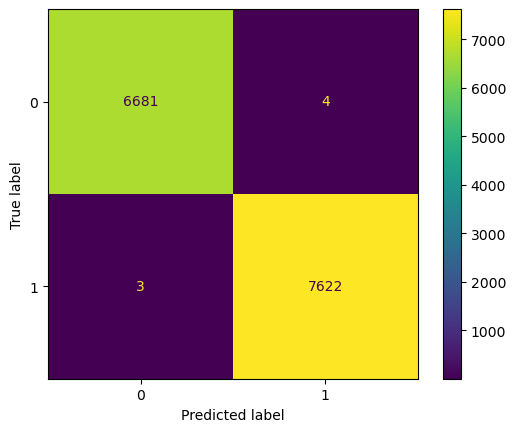

In [42]:
disp.plot()

# Precision Recall Curve

# The PR-curve requires precision-recall to be calculated, and for that we need probabilities of the predictions.


# Support Vector Classifier (SVC)

In [43]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)

svc_preds = svc.predict(X_test) # Predictions
svc_prob = svc.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [44]:
svc_prob

array([1.00000000e+00, 1.00000010e-07, 6.24034837e-06, ...,
       1.00000010e-07, 5.36245207e-05, 1.00000010e-07])

In [45]:
accuracy = accuracy_score(y_test,svc_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 99.95%


In [46]:
from sklearn.metrics import accuracy_score,precision_recall_curve,auc

In [47]:
precision_1,recall_1,threshold_1 = precision_recall_curve(y_test,svc_prob)

# This is Area Under Curve (AUC) which measures the performance of the model.
# Higher AUC means better model.
# Range of AUC is 0 to 1

In [48]:
auc_1= auc(recall_1,precision_1)
print(auc_1)

0.9999724381334831


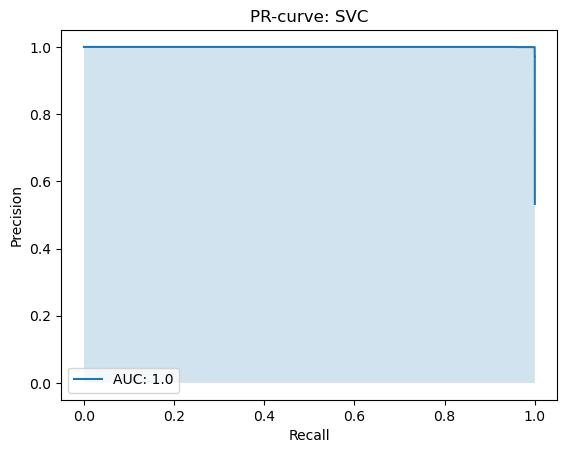

In [49]:
plt.title('PR-curve: SVC')

plt.plot(recall_1,precision_1,label=f'AUC: {round(auc_1,2)}')

plt.fill_between(recall_1,precision_1,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [50]:
df[df['Disease']==1]

,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,Pupil position left X,Pupil position left Y,Pupil position left Z,Pupil position right X,Pupil position right Y,Pupil position right Z,Pupil diameter left,Pupil diameter right,Disease
1,621,176,161.5331,173.2975,583.4825,0.20433,0.28133,0.93761,0.28050,0.30803,0.90909,31.78,-23.44,-31.93,-31.67,-22.12,-29.04,4.227,4.111,1
2,870,138,40.0813,216.5730,655.9355,0.01606,0.33951,0.94046,0.09615,0.31660,0.94368,30.63,-23.18,-31.73,-32.22,-21.75,-29.35,4.045,3.998,1
4,833,37,65.6117,294.4182,705.6104,0.04967,0.40779,0.91172,0.11505,0.37934,0.91808,30.68,-23.09,-31.89,-32.13,-21.50,-29.50,4.838,4.625,1
6,775,175,87.0287,180.5656,604.8428,0.08490,0.31118,0.94655,0.17450,0.29199,0.94037,31.01,-23.22,-31.86,-31.88,-21.80,-29.32,3.866,3.763,1
8,852,181,53.5353,204.8895,697.5514,0.02991,0.30190,0.95287,0.11191,0.29270,0.94963,30.90,-23.39,-31.71,-32.42,-21.88,-29.30,4.314,4.390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57233,748,133,91.9512,184.4469,551.7711,0.09782,0.33072,0.93864,0.19683,0.33069,0.92299,31.14,-23.27,-31.88,-31.92,-21.66,-29.52,4.083,4.064,1
57235,114,441,137.7565,12.7628,190.3752,0.09068,0.31422,0.94501,0.59927,0.12501,0.79073,31.02,-22.84,-32.81,-29.24,-22.19,-29.75,4.246,4.464,1
57236,751,260,110.1506,150.2694,667.4919,0.10655,0.24303,0.96415,0.19398,0.23720,0.95190,31.21,-23.71,-31.66,-31.85,-21.97,-29.27,4.254,4.206,1
57237,604,220,175.9074,156.1956,601.8901,0.21334,0.25474,0.94318,0.29250,0.27827,0.91488,31.78,-23.65,-31.73,-31.62,-22.39,-29.02,4.166,4.011,1


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(max_depth=5,min_samples_split=200)

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=200)

In [54]:
rfc_pred = rfc.predict(X_test)

In [55]:
rfc_accuracy = accuracy_score(y_test,rfc_pred)

In [56]:
rfc_accuracy*100

100.0

In [57]:
rfc_recall = recall_score(y_test,rfc_pred)
print(rfc_recall)

1.0


In [58]:
cm = confusion_matrix(y_test,rfc_pred)

In [59]:
cm

array([[6685,    0],
       [   0, 7625]], dtype=int64)

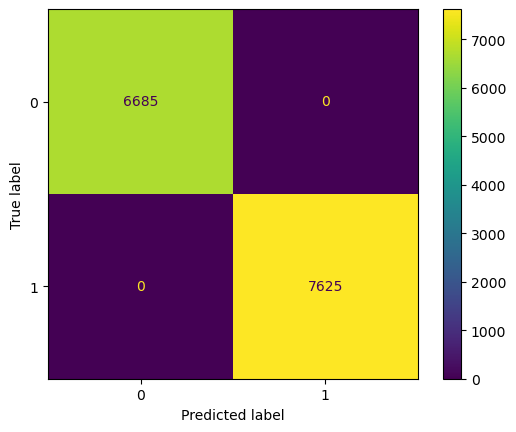

In [60]:
# plt.title('Random Forest Classifier')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc_preds = rfc.predict(X_test) # Predictions
rfc_prob = rfc.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [62]:
rfc_prob

array([1., 0., 0., ..., 0., 0., 0.])

In [63]:
accuracy = accuracy_score(y_test,rfc_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 100.0%


In [64]:
precision_2,recall_2,threshold_2 = precision_recall_curve(y_test,rfc_prob)

In [65]:
auc_2 =auc(recall_2,precision_2)  
print(auc_2)

1.0


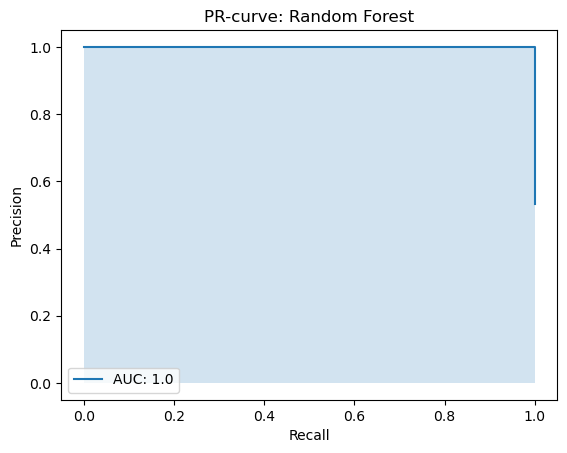

In [66]:
plt.title('PR-curve: Random Forest')

plt.plot(recall_2,precision_2,label=f'AUC: {round(auc_2,2)}')

plt.fill_between(recall_2,precision_2,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbc = GradientBoostingClassifier(learning_rate=0.01)

In [69]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [70]:
gbc_pred = gbc.predict(X_test)

In [71]:
gbc_accuracy = accuracy_score(y_test,gbc_pred)
gbc_recall = recall_score(y_test,gbc_pred)

In [72]:
gbc_accuracy*100

99.99301187980433

In [73]:
gbc_recall*100

100.0

In [74]:
cm = confusion_matrix(y_test,gbc_pred)

In [75]:
cm

array([[6684,    1],
       [   0, 7625]], dtype=int64)

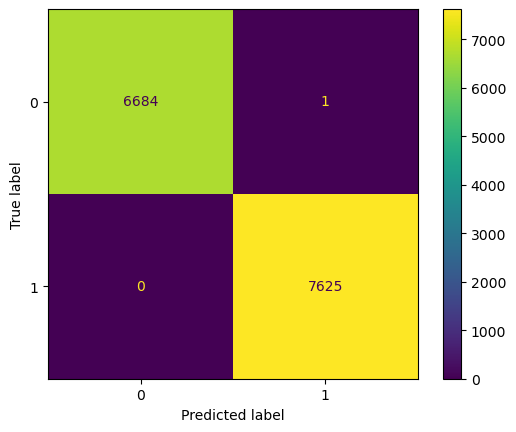

In [76]:
# plt.title('GradientBoosting')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbc.classes_)
disp.plot()
plt.show()

In [77]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train,y_train)

grad_boost_preds = grad_boost.predict(X_test) # Predictions
grad_boost_prob = grad_boost.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE

In [78]:
grad_boost_prob

array([9.99979329e-01, 2.31205517e-05, 2.31205517e-05, ...,
       2.31205517e-05, 2.31205517e-05, 2.31205517e-05])

In [79]:
accuracy = accuracy_score(y_test,grad_boost_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 99.99%


In [80]:
precision_3,recall_3,threshold_3 = precision_recall_curve(y_test,grad_boost_prob)

In [81]:
auc_3 =auc(recall_3,precision_3)  
print(auc_3)

0.9999344348282193


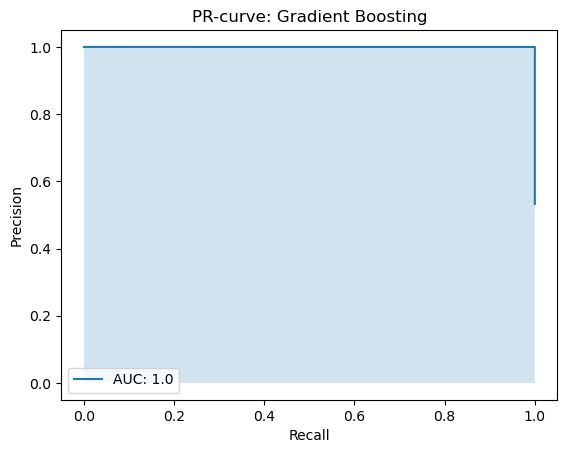

In [82]:
plt.title('PR-curve: Gradient Boosting')

plt.plot(recall_3,precision_3,label=f'AUC: {round(auc_3,2)}')

plt.fill_between(recall_3,precision_3,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Logistic Regression (LR)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logit = LogisticRegression(penalty = 'l1', solver='liblinear')

In [85]:
logit.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [86]:
logit_pred = logit.predict(X_test)

In [87]:
logit_accuracy = accuracy_score(y_test,logit_pred)
logit_recall = recall_score(y_test,logit_pred)

In [88]:
logit_accuracy*100

99.99301187980433

In [89]:
logit_recall*100

99.98688524590163

In [90]:
cm = confusion_matrix(y_test,logit_pred)

In [91]:
cm

array([[6685,    0],
       [   1, 7624]], dtype=int64)

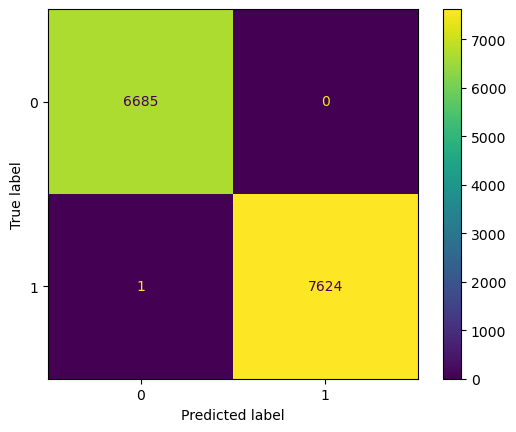

In [92]:
# plt.title('Logistic Regression')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logit.classes_)
disp.plot()
plt.show()

In [93]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)

log_reg_preds = log_reg.predict(X_test) # Predictions
log_reg_prob = log_reg.predict_proba(X_test)[:,1] 

# THIS WILL BE USED FOR PR-CURVE 

In [94]:
log_reg_prob

array([9.99999999e-01, 1.31218987e-10, 4.49151668e-07, ...,
       3.77314831e-10, 5.65976664e-05, 1.95312793e-08])

In [95]:
accuracy = accuracy_score(y_test,log_reg_preds)
print(f'Accuracy : {round(accuracy*100,2)}%')

Accuracy : 99.96%


In [96]:
precision_4,recall_4,threshold_4 = precision_recall_curve(y_test,log_reg_prob)

In [97]:
auc_4 =auc(recall_4,precision_4)  
print(auc_4)

0.9999730425548566


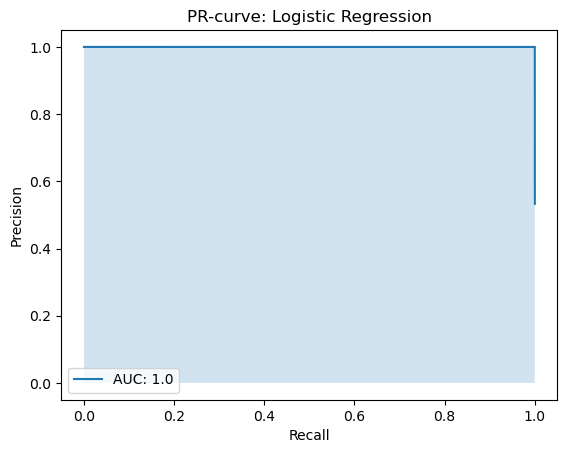

In [98]:
plt.title('PR-curve: Logistic Regression')

plt.plot(recall_4,precision_4,label=f'AUC: {round(auc_4,2)}')

plt.fill_between(recall_4,precision_4,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# MODEL PERFORMANCE

# ==> Comparing all four charts/plots

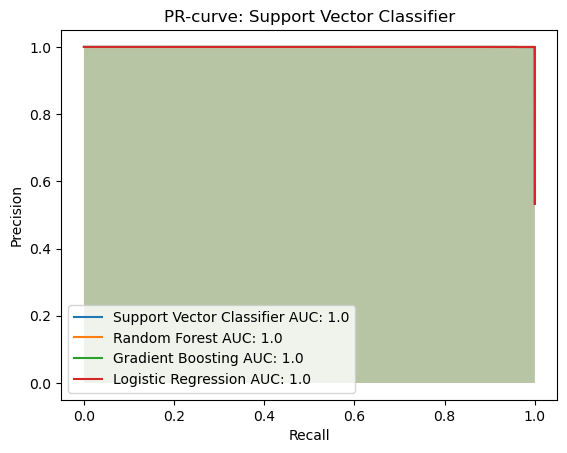

In [99]:
plt.title('PR-curve: Support Vector Classifier')
# Support Vector Classifier
plt.plot(recall_1,precision_1,label=f'Support Vector Classifier AUC: {round(auc_1,2)}')
plt.fill_between(recall_1,precision_1,alpha=0.2)


# Random Forest
plt.plot(recall_2,precision_2,label=f'Random Forest AUC: {round(auc_2,2)}')
plt.fill_between(recall_2,precision_2,alpha=0.2)

# Gradient Boosting
plt.plot(recall_3,precision_3,label=f'Gradient Boosting AUC: {round(auc_3,2)}')
plt.fill_between(recall_3,precision_3,alpha=0.2)

# Logistic Regression
plt.plot(recall_4,precision_4,label=f'Logistic Regression AUC: {round(auc_4,2)}')

# plt.fill_between(recall_1,precision_1,alpha=0.2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()